In [1]:
import numpy as np
from metrics.iou import IoU
from PIL import Image
import matplotlib.pyplot as plt

from metrics.get_indexMap import get_indMap
from utils.matterport3d_categories import mp3dcat
from utils.mapping_utils import load_map


In [2]:
scene_id = "2t7WUuJeko7_2_mini"
vln ="seem"#"dummy_geo_dist4_reverse3_4llava_wall4"#"dummy_geo_dist4_reverse3_4llava_wall"#"dummy_geo_dist4_reverse3_4llava" #"dummy_geo_dist4_reverse3" #^ lseg, seem, seem_conf

In [3]:
path = "/nvme0n1/hong/VLMAPS/InstanceSeemMap/Data/habitat_sim/"+scene_id+"/map/"
gt_path = path + "grid_gt_gt.npy"
pred_path = path + f"2t7WUuJeko7_2_mini_base_check/grid_base_check.npy"
obstacle_path = path + f"2t7WUuJeko7_2_mini_base_check/obstacles_base_check.npy"
color_top_down_path = path + f"2t7WUuJeko7_2_mini_base_check/color_top_down_base_check.npy"
print(gt_path,pred_path,sep='\n')

/nvme0n1/hong/VLMAPS/InstanceSeemMap/Data/habitat_sim/2t7WUuJeko7_2_mini/map/grid_gt_gt.npy
/nvme0n1/hong/VLMAPS/InstanceSeemMap/Data/habitat_sim/2t7WUuJeko7_2_mini/map/2t7WUuJeko7_2_mini_base_check/grid_base_check.npy


912 1103 875 1092


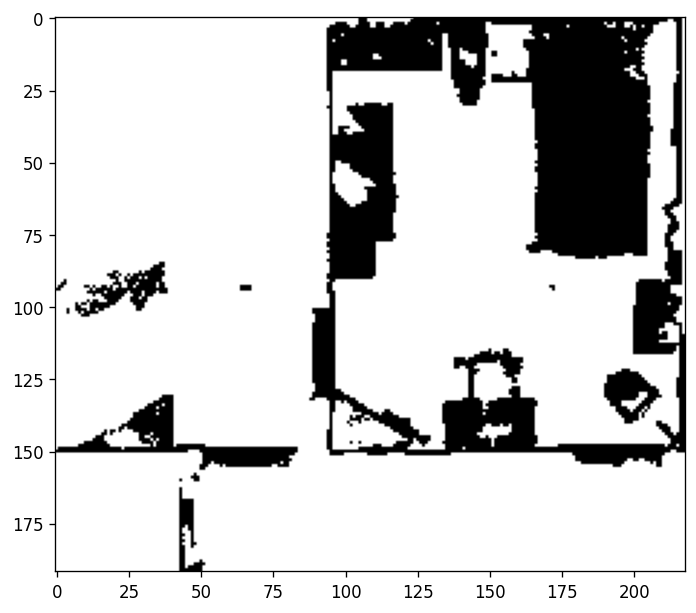

In [4]:
obstacle_map = load_map(obstacle_path)
gt_map = load_map(gt_path)
gt_map[gt_map == -1] = len(mp3dcat)
pred_map = load_map(pred_path)

x_indices, y_indices = np.where(obstacle_map == 0)
xmin = np.min(x_indices)
xmax = np.max(x_indices)
ymin = np.min(y_indices)
ymax = np.max(y_indices)

print(xmin, xmax, ymin, ymax)
obstacles_pil = Image.fromarray(obstacle_map[xmin:xmax+1, ymin:ymax+1])
plt.figure(figsize=(8, 6), dpi=120)
plt.imshow(obstacles_pil, cmap='gray')
plt.show()

gt_map = gt_map[xmin:xmax+1, ymin:ymax+1]
pred_map = pred_map[xmin:xmax+1, ymin:ymax+1]

In [5]:
ind_map = get_indMap(pred_map, vln, mp3dcat, [xmax,xmin,ymax,ymin])

Original SEEM based


[*] model loaded


In [6]:
print(f"gt: {gt_map.shape}, pred: {ind_map.shape}")

# Initialize IoU metric calculator
iou_metric = IoU(num_classes=len(mp3dcat)+1, ignore_index=[1,2])#[0,1,2])

# Add the predicted and target data to the metric calculator
iou_metric.add(ind_map,gt_map)

# Compute and print the metrics
iou, miou, acc, fwiou, mf1, recalls, recall, precisions, precision = iou_metric.value()
print(f"IoU per class: {iou}")
print(f"Mean IoU: {miou}")
print(f"Accuracy: {acc}")
print(f"Fwiou: {fwiou}")
print(f"Mean F1: {mf1}")
print(f"Mean Recall: {recall}")
print(f"Mean Precision: {precision}")
print(f"Recall per class: {recalls}")
print(f"Precision per class: {precisions}")

gt: (192, 218), pred: (192, 218)
40 0 42
<class 'numpy.ndarray'>
(42, 42)
IoU per class: [0.97546733        nan        nan 0.22551391 0.5890411  0.38547486
 0.         0.                nan 0.         0.         0.87043478
 0.64470588 0.         0.04117647 0.                nan 0.
        nan 0.         0.         0.                nan        nan
        nan        nan 0.         0.                nan        nan
        nan        nan        nan        nan 0.                nan
 0.         0.         0.         0.         0.                nan]
Mean IoU: 0.1492725732589808
Accuracy: 0.9068553497073201
Fwiou: 0.8709956428533766
Mean F1: 0.6353209829949628
Mean Recall: 0.3095345439758496
Mean Precision: 0.3099769259069107
Recall per class: [0.99647519        nan        nan 0.79530917 0.61575179 0.44183565
 0.         0.                nan        nan 0.         0.95363607
 0.79883382        nan 0.04117647        nan        nan        nan
        nan        nan        nan        nan       

In [7]:
print(f"gt: {gt_map.shape}, pred: {ind_map.shape}")

# Initialize IoU metric calculator
iou_metric = IoU(num_classes=len(mp3dcat)+1, ignore_index=[])

# Add the predicted and target data to the metric calculator
iou_metric.add(ind_map,gt_map)

# Compute and print the metrics
iou, miou, acc, fwiou, mf1, recalls, recall, precisions, precision = iou_metric.value()
print(f"IoU per class: {iou}")
print(f"Mean IoU: {miou}")
print(f"Accuracy: {acc}")
print(f"Fwiou: {fwiou}")
print(f"Mean F1: {mf1}")
print(f"Mean Recall: {recall}")
print(f"Mean Precision: {precision}")
print(f"Recall per class: {recalls}")
print(f"Precision per class: {precisions}")

gt: (192, 218), pred: (192, 218)
40 0 42
<class 'numpy.ndarray'>
(42, 42)
IoU per class: [0.93935079 0.37489102 0.73946418 0.20826354 0.2885906  0.34702431
 0.         0.                nan 0.         0.         0.83393502
 0.6075388  0.         0.03517588 0.                nan 0.
        nan 0.         0.         0.                nan        nan
        nan        nan 0.         0.                nan        nan
        nan        nan        nan        nan 0.                nan
 0.         0.         0.         0.         0.                nan]
Mean IoU: 0.16200867176484823
Accuracy: 0.8559824159021406
Fwiou: 0.7827108168070249
Mean F1: 0.6006059386560287
Mean Recall: 0.32841605749250913
Mean Precision: 0.3281456897740898
Recall per class: [0.99018514 0.5537669  0.88411013 0.70777989 0.3458445  0.39693193
 0.         0.                nan        nan 0.         0.91027584
 0.75900277        nan 0.03517588        nan        nan        nan
        nan        nan        nan        nan     

In [8]:
print(len(mp3dcat)+1)

42


In [9]:
MPA=[]
MIOU=[]
F1=[]
aa=[]
FWIOU=[]

#! all index used
mask = (gt_map == ind_map)
pa = np.sum(mask) / mask.size

#! ignore index 0~3
# valid_mask = (gt > 2) & (predicts > 2)  # a와 b 모두 3 이상인 위치만 고려
# comparison_mask = (gt == predicts) & valid_mask  # 유효한 위치에서 값이 동일한 경우 True

# # 유효한 위치에 대한 Pixel Accuracy (PA) 계산
# pa = np.sum(comparison_mask) / np.sum(valid_mask)




for i in range(len(mp3dcat)):
    # if i<3: continue
    if i < 3 : continue
    m1 = (gt_map==i)
    m2 = (ind_map==i)
    # if np.sum(m1)==0: continue
    # if np.sum(m1)<100: continue
    mpa_i=np.sum(np.logical_and(m1,m2))/np.sum(m1)
    miou_i=np.sum(np.logical_and(m1,m2))/np.sum(np.logical_or(m1,m2))
    fwiou_i=np.sum(m1)*miou_i
    f1_i=2*np.sum(np.logical_and(m1,m2))/(np.sum(np.logical_or(m1,m2))+np.sum(np.logical_and(m1,m2)))
    MPA.append(mpa_i)
    MIOU.append(miou_i)
    F1.append(f1_i)
    aa.append(np.sum(m1))
    FWIOU.append(fwiou_i)

/tmp/ipykernel_18539/2322478573.py:28: RuntimeWarning: invalid value encountered in long_scalars
  mpa_i=np.sum(np.logical_and(m1,m2))/np.sum(m1)
/tmp/ipykernel_18539/2322478573.py:29: RuntimeWarning: invalid value encountered in long_scalars
  miou_i=np.sum(np.logical_and(m1,m2))/np.sum(np.logical_or(m1,m2))
/tmp/ipykernel_18539/2322478573.py:31: RuntimeWarning: invalid value encountered in long_scalars
  f1_i=2*np.sum(np.logical_and(m1,m2))/(np.sum(np.logical_or(m1,m2))+np.sum(np.logical_and(m1,m2)))


In [10]:
mpa=np.nanmean(MPA)
miou=np.nanmean(MIOU)
f1=np.nanmean(F1)
fwiou=np.nansum(FWIOU)/np.nansum(aa)

print("####")
print(np.sum(aa))
print(mask.size)


print(len(MPA),len(MIOU),len(F1),len(aa))
# print(mpa,miou,f1,fwiou)
print(f"pa : {pa}")
print(f"mpa : {mpa}")
print(f"miou : {miou}")
print(f"f1 : {f1}")
print(f"fwiou : {fwiou}")
print(f"aa : {np.sum(aa)}")
print(f"mask_size : {mask.size}")
print("##########################################")
print(pa)
print(MPA)
print(MIOU)
print(F1)
print(aa)
print(np.sum(aa))

####
8765
41856
38 38 38 38
pa : 0.8559824159021406
mpa : 0.22535791485334292
miou : 0.09668867302179206
f1 : 0.1267152707093272
fwiou : 0.41807906014628554
aa : 8765
mask_size : 41856
##########################################
0.8559824159021406
[0.7077798861480076, 0.34584450402144773, 0.3969319271332694, 0.0, 0.0, nan, nan, 0.0, 0.9102758411639891, 0.7590027700831025, nan, 0.035175879396984924, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, 0.0, 0.0, 0.0]
[0.2082635399218314, 0.28859060402684567, 0.347024308466052, 0.0, 0.0, nan, 0.0, 0.0, 0.8339350180505415, 0.6075388026607539, 0.0, 0.035175879396984924, 0.0, nan, 0.0, nan, 0.0, 0.0, 0.0, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.34473197781885395, 0.4479166666666667, 0.5152457996266335, 0.0, 0.0, nan, 0.0, 0.0, 0.9094488188976378, 0.7558620689655172, 0.0, 0.06796116504854369, 0.0, nan, 0.0, nan, 0.0, 0.0, 0.0

In [2]:
import numpy as np
def intersection_and_union(im_pred, im_lab, num_class):
    im_pred = np.asarray(im_pred)
    im_lab = np.asarray(im_lab)
    # Remove classes from unlabeled pixels in gt image. 
    im_pred = im_pred * (im_lab > 0)
    # Compute area intersection:
    intersection = im_pred * (im_pred == im_lab)
    area_inter, _ = np.histogram(intersection, bins=num_class-1,
                                        range=(1, num_class - 1))
    # Compute area union: 
    area_pred, _ = np.histogram(im_pred, bins=num_class-1,
                                range=(1, num_class - 1))
    area_lab, _ = np.histogram(im_lab, bins=num_class-1,
                               range=(1, num_class - 1))
    area_union = area_pred + area_lab - area_inter
    return area_inter, area_union

a = np.array([
    [1, 2, 2],
    [1, 0, 2],
    [3, 3, 0]
])

b = np.array([
    [1, 2, 2],
    [0, 0, 2],
    [3, 3, 1]
])
n = 4
i, u = intersection_and_union(a, b, n)
print(i, u)

[1 3 2] [2 3 2]


In [3]:
from metrics.metrics import SegmentationMetric
import numpy as np
a = np.array([
    [1, 2, 2],
    [1, 0, 2],
    [3, 3, 0]
])

b = np.array([
    [1, 2, 2],
    [0, 0, 2],
    [3, 3, 1]
])
sm = SegmentationMetric([0,1,2,3])
p, mp, mi, fwmi = sm.cal(a,b)
print(sm.class_iou_list, sm.area_size)
print(mi, fwmi)
print(p, mp)
print(sm.pacc, sm.mpacc, sm.class_pacc_list)

print(p, mp, mi, fwmi)

[[ 1  2  2]
 [-1  0  2]
 [ 3  3 -1]]
[1 1 3 2] [2 2 3 2] [2 2 3 2]
[1 1 3 2] [3 3 3 2]
[0.33333334 0.33333334 1.         1.        ] [2 2 3 2]
0.6666667 0.7037037081188625
0.7777777777777778 0.75
0.7777777777777778 0.75 [0.5 0.5 1.  1. ]
0.7777777777777778 0.75 0.6666667 0.7037037081188625


In [17]:
a=np.array([[0,0,1],[1,1,0],[0,1,0]])
np.sum((a<1)&(a>=0))

5